<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS18_422_Train_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: Student should be able to explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: Student should be able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: Student should be able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

## Follow Along

In this section, we will again a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

<center><img src="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/main/module1-Architect/IMG_99C94113202D-1.jpeg"width=500></center>

### Generate some Fake Data

In [ ]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

In [ ]:
outputs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47.847687, 53.644787, 46.36113 , 50.803284, 47.299168, 53.30744 ,
       50.223858, 50.641045, 47.42235 , 54.397503], dtype=float32)>

In [ ]:
inputs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-6.09841049e-01,  7.82421231e-01, -7.90602148e-01,  6.20084256e-03,
       -6.88607991e-01,  1.17718327e+00, -6.18792488e-04, -1.14075705e-01,
       -1.09092891e+00,  1.64275575e+00], dtype=float32)>

In [ ]:
noise[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.01786951,  0.90631163, -0.8717594 ,  0.78158087, -0.2907014 ,
       -0.8126976 ,  0.22602394,  1.0403105 ,  1.2406062 , -1.3521439 ],
      dtype=float32)>

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

In [ ]:
def loss(target_y, predicted_y):
  """MSE"""
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [ ]:
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 64.0

In [ ]:
print(model(-1.0).numpy())  # What should this be?

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

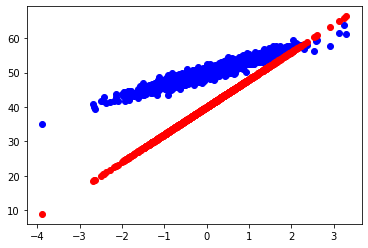

Current loss: 119.086716


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [ ]:
def train(model, inputs, outputs, learning_rate):
  # "Gradient tape" TensorFlow magic to keep track of loss
  with tf.GradientTape() as t:
     current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  #print(dW, db)  # Will be very verbose
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

### Train the Network

In [ ]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(30)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=119.08672
Epoch  1: W=7.16 b=41.98 loss=77.37471
Epoch  2: W=6.47 b=43.57 loss=50.40117
Epoch  3: W=5.92 b=44.84 loss=32.95627
Epoch  4: W=5.46 b=45.86 loss=21.67259
Epoch  5: W=5.09 b=46.68 loss=14.37323
Epoch  6: W=4.79 b=47.34 loss=9.65078
Epoch  7: W=4.55 b=47.87 loss=6.59513
Epoch  8: W=4.35 b=48.29 loss=4.61777
Epoch  9: W=4.18 b=48.63 loss=3.33804
Epoch 10: W=4.05 b=48.90 loss=2.50974
Epoch 11: W=3.95 b=49.12 loss=1.97355
Epoch 12: W=3.86 b=49.30 loss=1.62642
Epoch 13: W=3.79 b=49.44 loss=1.40167
Epoch 14: W=3.73 b=49.55 loss=1.25613
Epoch 15: W=3.68 b=49.64 loss=1.16189
Epoch 16: W=3.65 b=49.72 loss=1.10085
Epoch 17: W=3.61 b=49.78 loss=1.06131
Epoch 18: W=3.59 b=49.82 loss=1.03570
Epoch 19: W=3.57 b=49.86 loss=1.01911
Epoch 20: W=3.55 b=49.89 loss=1.00836
Epoch 21: W=3.54 b=49.92 loss=1.00139
Epoch 22: W=3.53 b=49.93 loss=0.99688
Epoch 23: W=3.52 b=49.95 loss=0.99396
Epoch 24: W=3.51 b=49.96 loss=0.99206
Epoch 25: W=3.51 b=49.97 loss=0.99083
Epoch

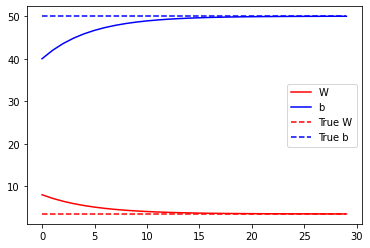

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## Challenge

In the module project, you will be asked to explain the logic of backpropagation and gradient descent.

### In the following two sections we'll look at batch size and learning rate hyperparameters in isolation. 
However, it's important to know that recent research found some interesting relationships between batch sizes and learning rates. The best available suggestion today is to scale batch size proportionally to a learning rate:
- https://openreview.net/pdf?id=B1Yy1BxCZ
- https://papers.nips.cc/paper/8398-control-batch-size-and-learning-rate-to-generalize-well-theoretical-and-empirical-evidence.pdf

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.

### Baseline Model

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=0.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## Follow Along
Let's run a series of experiments for a default, small, and large batch size.

### Default
Batch Size is 32

In [ ]:
model = create_model()
bt_default = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7626 - accuracy: 0.7900 - val_loss: 0.3497 - val_accuracy: 0.8969
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3265 - accuracy: 0.9068 - val_loss: 0.2849 - val_accuracy: 0.9189
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9214 - val_loss: 0.2544 - val_accuracy: 0.9256
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2412 - accuracy: 0.9309 - val_loss: 0.2236 - val_accuracy: 0.9347
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2171 - accuracy: 0.9373 - val_loss: 0.2069 - val_accuracy: 0.9385
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1983 - accuracy: 0.9439 - val_loss: 0.1924 - val_accuracy: 0.9435
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1823 - accuracy: 0.9476 - val_loss: 0.1812 - val_accuracy:

### Small Batch Size
Batch Size is 8

In [ ]:
model = create_model()
bt_small = model.fit(X_train, y_train,
                     epochs=10,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.4062 - accuracy: 0.8820 - val_loss: 0.2282 - val_accuracy: 0.9341
Epoch 2/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.2107 - accuracy: 0.9386 - val_loss: 0.1724 - val_accuracy: 0.9490
Epoch 3/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.1656 - accuracy: 0.9515 - val_loss: 0.1571 - val_accuracy: 0.9525
Epoch 4/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.1384 - accuracy: 0.9592 - val_loss: 0.1238 - val_accuracy: 0.9632
Epoch 5/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.1200 - accuracy: 0.9644 - val_loss: 0.1132 - val_accuracy: 0.9666
Epoch 6/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.1070 - accuracy: 0.9683 - val_loss: 0.1106 - val_accuracy: 0.9672
Epoch 7/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.0967 - accuracy: 0.9711 - val_loss: 0.1101 - val_accuracy:

### Large Batch Size
Batch Size is 512

In [ ]:
model = create_model()
bt_large = model.fit(X_train, y_train,
                     epochs=10,
                     batch_size=512,
                     validation_data=(X_test, y_test))

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 2.2005 - accuracy: 0.2040 - val_loss: 2.0245 - val_accuracy: 0.3839
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 1.7712 - accuracy: 0.5260 - val_loss: 1.4688 - val_accuracy: 0.6475
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 1.2533 - accuracy: 0.7097 - val_loss: 1.0168 - val_accuracy: 0.7772
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.9057 - accuracy: 0.7918 - val_loss: 0.7629 - val_accuracy: 0.8205
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.7148 - accuracy: 0.8266 - val_loss: 0.6243 - val_accuracy: 0.8441
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6064 - accuracy: 0.8458 - val_loss: 0.5433 - val_accuracy: 0.8580
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5402 - accuracy: 0.8584 - val_loss: 0.4930 - val_accuracy: 0.8680
Epoch 

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large], ["32_", "8_", "512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.762634,0.790033,0.349656,0.8969,0,32_
1,0.326473,0.906750,0.284932,0.9189,1,32_
2,0.272740,0.921367,0.254405,0.9256,2,32_
3,0.241160,0.930883,0.223584,0.9347,3,32_
4,0.217136,0.937267,0.206883,0.9385,4,32_


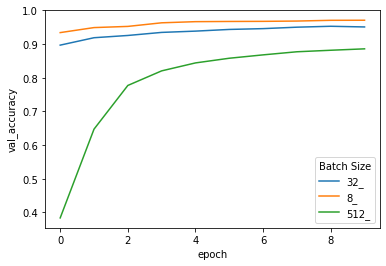

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

In [ ]:
# Exercise - rerun the above with 25 epochs
# You may find that the 32 batch size converges/crosses over
# in accuracy with the 8 batch size

## Challenge

You will be expected to experiment with batch size on today's assignment.

# Learning Rate (Learn)

## Overview

Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldy Locks parameters - it needs be "just right"
* Scale of 0-1

## Follow Along

Same experiment with Batch but different learning rates:
* High Learning = .75
* Default Learning = .01
* Low Learning Rate = .0001

### Default Learning Rate

In [ ]:
model = create_model()
# Default is 0.01
lr_default = model.fit(X_train, y_train,
                       epochs=25,
                       validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7525 - accuracy: 0.7815 - val_loss: 0.3611 - val_accuracy: 0.8978
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3347 - accuracy: 0.9028 - val_loss: 0.3028 - val_accuracy: 0.9127
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9183 - val_loss: 0.2579 - val_accuracy: 0.9248
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9278 - val_loss: 0.2307 - val_accuracy: 0.9320
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2233 - accuracy: 0.9352 - val_loss: 0.2129 - val_accuracy: 0.9383
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2026 - accuracy: 0.9412 - val_loss: 0.1937 - val_accuracy: 0.9435
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1854 - accuracy: 0.9461 - val_loss: 0.1784 - val_accuracy:

### High Learning Rate

In [ ]:
model = create_model(lr=0.75)
lr_high = model.fit(X_train, y_train,
                    epochs=25,
                    validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4053 - accuracy: 0.4062 - val_loss: 1.3498 - val_accuracy: 0.4082
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2172 - accuracy: 0.4770 - val_loss: 0.9655 - val_accuracy: 0.5694
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9788 - accuracy: 0.5855 - val_loss: 0.7753 - val_accuracy: 0.6536
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8851 - accuracy: 0.6244 - val_loss: 0.8718 - val_accuracy: 0.6369
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9196 - accuracy: 0.6207 - val_loss: 1.1244 - val_accuracy: 0.5441
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9451 - accuracy: 0.5993 - val_loss: 1.0381 - val_accuracy: 0.5436
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0406 - accuracy: 0.5467 - val_loss: 1.1058 - val_accuracy:

### Low Learning Rate

In [ ]:
model = create_model(lr=0.0001)
lr_low = model.fit(X_train, y_train,
                   epochs=25,
                   validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3297 - accuracy: 0.1663 - val_loss: 2.2839 - val_accuracy: 0.2039
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2524 - accuracy: 0.2287 - val_loss: 2.2192 - val_accuracy: 0.2563
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1928 - accuracy: 0.2715 - val_loss: 2.1597 - val_accuracy: 0.2884
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1341 - accuracy: 0.2997 - val_loss: 2.0988 - val_accuracy: 0.3164
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0734 - accuracy: 0.3216 - val_loss: 2.0355 - val_accuracy: 0.3387
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0100 - accuracy: 0.3435 - val_loss: 1.9691 - val_accuracy: 0.3643
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9433 - accuracy: 0.3676 - val_loss: 1.8998 - val_accuracy:

### Visualization of Results

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_low, lr_high],
                       [".01_", ".0001_", ".75_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.752455,0.781550,0.361144,0.8978,0,.01_
1,0.334718,0.902783,0.302789,0.9127,1,.01_
2,0.283139,0.918250,0.257914,0.9248,2,.01_
3,0.249996,0.927783,0.230712,0.9320,3,.01_
4,0.223298,0.935250,0.212855,0.9383,4,.01_


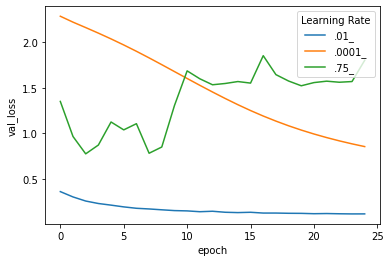

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

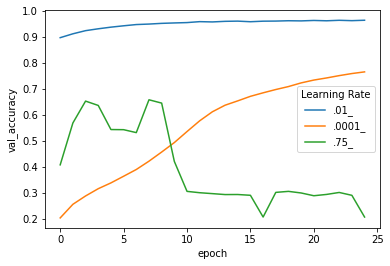

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

## Challenge

You will be expected to experiment with different learning rates today.

---